In [1]:
# Decision tree from scratch

# Two entities: salmon and tuna
# Features: length and weight

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
df = pd.read_csv('fish.csv')
df.head()

,length,weight,type
0,8.618381,7.848030,tuna
1,2.522046,8.762507,tuna
2,2.035690,7.101971,tuna
3,6.695008,4.953932,salmon
4,9.834069,7.908453,tuna


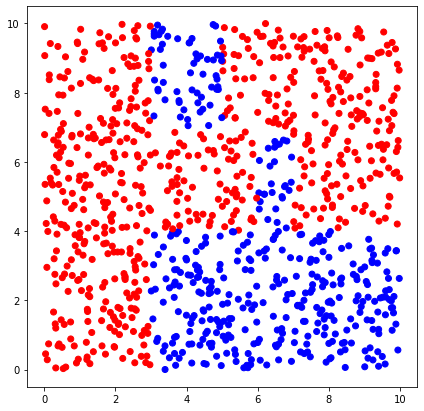

In [43]:

plt.figure(figsize=(7,7))
plt.scatter(df.length, df.weight, marker='o', color=['red' if t=='tuna' else 'blue' for t in df.type]);

In [44]:
# convert categories into 0 and 1
df.type = df.type.apply(lambda t: 1 if t == 'salmon' else 0)

In [45]:
df.head()

,length,weight,type
0,8.618381,7.848030,0
1,2.522046,8.762507,0
2,2.035690,7.101971,0
3,6.695008,4.953932,1
4,9.834069,7.908453,0


In [46]:
# for a list of 0s and 1s, the trick of finding a proportion of 1s
# is finding the "mean" of the list
l = [0,1,1,1,0,0,0,1,0,0]
np.mean(l)

0.4

In [47]:
def get_entropy(vals):
    p = np.mean(vals)
    if p==0 or p==1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

In [48]:
get_entropy([0,0,1,1,0,1,1,1,1,0])

0.9709505944546686

In [49]:
def get_entropy_from_split(df, feature, val):
    left_types = df[df[feature] < val].type
    right_types = df[df[feature] >= val].type
    
    # get entrpy of left and right side
    left_entropy = get_entropy(left_types)
    right_entropy = get_entropy(right_types)
    
    # find proportions of left/right samples
    left_prop = len(left_types) / len(df)
    right_prop = len(right_types) / len(df)
    
    # return weighted average of entropy
    return left_prop*left_entropy + right_prop*right_entropy

In [56]:
curr_df = df.copy()
curr_df = curr_df[(curr_df.length > 0)]

In [57]:
features = ['length', 'weight']

best_params = {'feature': None, 'val': None, 'entropy': np.inf}

for f in features:
    curr = curr_df[f].min()
    step = 0.1
    while curr < curr_df[f].max():
        curr_entropy = get_entropy_from_split(curr_df, f, curr)
        if curr_entropy < best_params['entropy']:
            best_params['feature'] = f
            best_params['val'] = curr
            best_params['entropy'] = curr_entropy
        curr += step
print(best_params)

{'feature': 'length', 'val': 3.0065456626365483, 'entropy': 0.6843553171032571}


In [58]:
curr_df = curr_df[(curr_df.length > 3)]

In [59]:
features = ['length', 'weight']

best_params = {'feature': None, 'val': None, 'entropy': np.inf}

for f in features:
    curr = curr_df[f].min()
    step = 0.1
    while curr < curr_df[f].max():
        curr_entropy = get_entropy_from_split(curr_df, f, curr)
        if curr_entropy < best_params['entropy']:
            best_params['feature'] = f
            best_params['val'] = curr
            best_params['entropy'] = curr_entropy
        curr += step
print(best_params)

{'feature': 'weight', 'val': 4.001260199577321, 'entropy': 0.426763555582736}


In [60]:
curr_df = curr_df[(curr_df.length > 3) & (curr_df.weight > 4)]

In [61]:
features = ['length', 'weight']

best_params = {'feature': None, 'val': None, 'entropy': np.inf}

for f in features:
    curr = curr_df[f].min()
    step = 0.1
    while curr < curr_df[f].max():
        curr_entropy = get_entropy_from_split(curr_df, f, curr)
        if curr_entropy < best_params['entropy']:
            best_params['feature'] = f
            best_params['val'] = curr
            best_params['entropy'] = curr_entropy
        curr += step
print(best_params)

{'feature': 'length', 'val': 7.008879131610914, 'entropy': 0.5524718527527053}


In [62]:
curr_df = curr_df[(curr_df.length < 7) & (curr_df.weight > 4)]

In [63]:
features = ['length', 'weight']

best_params = {'feature': None, 'val': None, 'entropy': np.inf}

for f in features:
    curr = curr_df[f].min()
    step = 0.1
    while curr < curr_df[f].max():
        curr_entropy = get_entropy_from_split(curr_df, f, curr)
        if curr_entropy < best_params['entropy']:
            best_params['feature'] = f
            best_params['val'] = curr
            best_params['entropy'] = curr_entropy
        curr += step
print(best_params)

{'feature': 'length', 'val': 5.008879131610921, 'entropy': 0.8954692060203256}
